# Analyse Exploratoire des Ventes d'une Chaine de vente d'electroniques 

Nous avons dans le dossier datasets/SalesAnalysis des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv par mois.

Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?

Nous allons accompagner nos solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.



## Importer les données

Essayons de Monter notre google drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [5]:
data = "datasets/SalesAnalysis/Sales_Data/"

In [6]:
os.listdir(data)

['Sales_July_2019.csv',
 'Sales_February_2019.csv',
 'Sales_August_2019.csv',
 'Sales_October_2019.csv',
 'Sales_November_2019.csv',
 'Sales_December_2019.csv',
 'Sales_January_2019.csv',
 'Sales_March_2019.csv',
 'Sales_June_2019.csv',
 'Sales_May_2019.csv',
 'Sales_September_2019.csv',
 'Sales_April_2019.csv']

Jetons un coup d'oeil à la data d'un mois, celui de Janvier

In [7]:
janvier_sales = pd.read_csv(data + "Sales_January_2019.csv")

In [8]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [9]:
janvier_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [10]:
janvier_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [11]:
janvier_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
Order ID            9697 non-null object
Product             9697 non-null object
Quantity Ordered    9697 non-null object
Price Each          9697 non-null object
Order Date          9697 non-null object
Purchase Address    9697 non-null object
dtypes: object(6)
memory usage: 455.8+ KB


## Merger la data

In [12]:
files = [fichier for fichier in os.listdir(data) if fichier.endswith('.csv')]
files

['Sales_July_2019.csv',
 'Sales_February_2019.csv',
 'Sales_August_2019.csv',
 'Sales_October_2019.csv',
 'Sales_November_2019.csv',
 'Sales_December_2019.csv',
 'Sales_January_2019.csv',
 'Sales_March_2019.csv',
 'Sales_June_2019.csv',
 'Sales_May_2019.csv',
 'Sales_September_2019.csv',
 'Sales_April_2019.csv']

In [13]:
df = pd.DataFrame()

for file in files:
  data_interm = pd.read_csv(data + file)
  df = pd.concat([df, data_interm])


In [14]:
df.shape

(186850, 6)

In [15]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


## Nettoyage de la data

In [17]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Affichon un df avec toutes les lignes qui ont au moins une valeur manquante

In [18]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN
1666,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN
2631,NaN,NaN,NaN,NaN,NaN,NaN


Est-ce que toutes les lignes n'ont que des valeurs manquantes

In [19]:
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

Supprimer toutes les lignes avec des valeurs manquantes: 

In [20]:
df.shape

(186850, 6)

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(186305, 6)

In [23]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [24]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Débarassons-nous des lignes avec des valeurs abérantes

In [25]:
df[df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2951,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3447,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3493,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3513,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [31]:
"1548".isdigit()

True

In [26]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2951,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3447,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3493,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3513,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [27]:
df.drop(df['Order Date'] == "Order Date")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001"
7,222917,LG Dryer,1,600.0,07/17/19 13:44,"490 Adams St, New York City, NY 10001"
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001"
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001"
10,222920,AA Batteries (4-pack),1,3.84,07/30/19 04:42,"590 6th St, San Francisco, CA 94016"
11,222921,Lightning Charging Cable,1,14.95,07/02/19 11:04,"960 Willow St, San Francisco, CA 94016"


In [28]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

In [29]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement des Types

In [30]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [31]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

/home/kevin/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

/home/kevin/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 18382
Data columns (total 6 columns):
Order ID            182735 non-null object
Product             182735 non-null object
Quantity Ordered    182735 non-null int64
Price Each          182735 non-null float64
Order Date          182735 non-null object
Purchase Address    182735 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ MB


In [34]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

/home/kevin/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 18382
Data columns (total 6 columns):
Order ID            182735 non-null object
Product             182735 non-null object
Quantity Ordered    182735 non-null int64
Price Each          182735 non-null float64
Order Date          182735 non-null datetime64[ns]
Purchase Address    182735 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [36]:
df['Order Date']

0        07/26/19 16:51
1        07/05/19 08:55
2        07/29/19 12:41
3        07/28/19 10:15
4        07/31/19 02:13
5        07/03/19 18:30
6        07/21/19 22:39
7        07/17/19 13:44
8        07/14/19 21:16
9        07/14/19 13:24
10       07/30/19 04:42
11       07/02/19 11:04
12       07/20/19 21:12
13       07/05/19 12:16
14       07/13/19 20:46
15       07/09/19 02:59
16       07/15/19 17:44
17       07/31/19 20:34
18       07/15/19 17:18
19       07/04/19 19:46
20       07/20/19 20:57
21       07/18/19 09:21
22       07/24/19 17:32
23       07/30/19 13:20
24       07/03/19 23:51
25       07/23/19 12:20
26       07/04/19 12:29
27       07/03/19 09:01
28       07/20/19 17:49
29       07/17/19 21:53
              ...      
18353    04/24/19 13:47
18354    04/09/19 01:16
18355    05/01/19 04:25
18356    04/02/19 20:54
18357    04/12/19 23:33
18358    04/09/19 22:51
18359    04/14/19 16:55
18360    04/18/19 16:41
18361    04/14/19 07:29
18362    04/02/19 16:26
18363    04/28/1

In [37]:
df_clean['Order Date']

0       2019-07-26 16:51:00
1       2019-07-05 08:55:00
2       2019-07-29 12:41:00
3       2019-07-28 10:15:00
4       2019-07-31 02:13:00
5       2019-07-03 18:30:00
6       2019-07-21 22:39:00
7       2019-07-17 13:44:00
8       2019-07-14 21:16:00
9       2019-07-14 13:24:00
10      2019-07-30 04:42:00
11      2019-07-02 11:04:00
12      2019-07-20 21:12:00
13      2019-07-05 12:16:00
14      2019-07-13 20:46:00
15      2019-07-09 02:59:00
16      2019-07-15 17:44:00
17      2019-07-31 20:34:00
18      2019-07-15 17:18:00
19      2019-07-04 19:46:00
20      2019-07-20 20:57:00
21      2019-07-18 09:21:00
22      2019-07-24 17:32:00
23      2019-07-30 13:20:00
24      2019-07-03 23:51:00
25      2019-07-23 12:20:00
26      2019-07-04 12:29:00
27      2019-07-03 09:01:00
28      2019-07-20 17:49:00
29      2019-07-17 21:53:00
                ...        
18353   2019-04-24 13:47:00
18354   2019-04-09 01:16:00
18355   2019-05-01 04:25:00
18356   2019-04-02 20:54:00
18357   2019-04-12 2

## Analyse Exploratoire proprement dite

## Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [38]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101"


In [39]:
df_clean.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            18373, 18374, 18375, 18376, 18377, 18378, 18379, 18380, 18381,
            18382],
           dtype='int64', length=182735)

In [40]:
df_clean  = df_clean.set_index('Order Date')

In [41]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-07-26 16:51:00,222910,Apple Airpods Headphones,1,150.00,"389 South St, Atlanta, GA 30301"
2019-07-05 08:55:00,222911,Flatscreen TV,1,300.00,"590 4th St, Seattle, WA 98101"
2019-07-29 12:41:00,222912,AA Batteries (4-pack),1,3.84,"861 Hill St, Atlanta, GA 30301"
2019-07-28 10:15:00,222913,AA Batteries (4-pack),1,3.84,"190 Ridge St, Atlanta, GA 30301"
2019-07-31 02:13:00,222914,AAA Batteries (4-pack),5,2.99,"824 Forest St, Seattle, WA 98101"


In [42]:
df_clean.sort_index(inplace=True)

In [43]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [44]:
df_clean['Month'] = df_clean.index.month_name()

In [45]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [46]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [47]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-11-19 12:00:00,291027,Macbook Pro Laptop,1,1700.00,"757 Lincoln St, Austin, TX 73301",November,1700.00
2019-10-29 16:58:00,265615,AAA Batteries (4-pack),2,2.99,"523 Highland St, San Francisco, CA 94016",October,5.98
2019-04-25 10:59:00,187104,Wired Headphones,1,11.99,"838 West St, Los Angeles, CA 90001",April,11.99
2019-06-22 00:22:00,214367,USB-C Charging Cable,1,11.95,"877 4th St, Atlanta, GA 30301",June,11.95
2019-05-30 23:01:00,197165,Apple Airpods Headphones,1,150.00,"515 5th St, Atlanta, GA 30301",May,150.00


In [48]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4.557905e+06
October      3.679254e+06
April        3.336376e+06
November     3.149785e+06
May          3.101881e+06
March        2.755969e+06
July         2.587445e+06
June         2.524465e+06
August       2.191698e+06
February     2.158127e+06
September    2.050361e+06
January      1.786511e+06
Name: chiffre_daffaire, dtype: float64

In [54]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [55]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1.786511e+06
February     2.158127e+06
March        2.755969e+06
April        3.336376e+06
May          3.101881e+06
June         2.524465e+06
July         2.587445e+06
August       2.191698e+06
September    2.050361e+06
October      3.679254e+06
November     3.149785e+06
December     4.557905e+06
Name: chiffre_daffaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire global par mois")

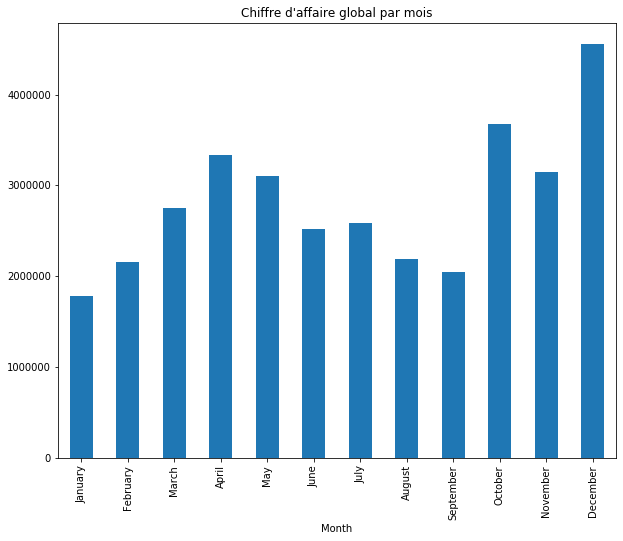

In [57]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title("Chiffre d'affaire global par mois")

In [79]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

4557905.420001525

Décembre est le mois avec le plus de ventes et le CA est de 4557905.420001525

## Dans quelle ville a-t-on le plus vendu de produits ?

In [58]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [59]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [60]:
"        python        ".strip()

'python'

In [61]:
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [62]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [63]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-10-14 18:17:00,272781,AA Batteries (4-pack),2,3.84,"803 8th St, Dallas, TX 75001",October,7.68,Dallas
2019-02-22 16:32:00,158087,AA Batteries (4-pack),1,3.84,"735 13th St, Los Angeles, CA 90001",February,3.84,Los Angeles
2019-04-09 18:39:00,185607,20in Monitor,1,109.99,"136 12th St, Los Angeles, CA 90001",April,109.99,Los Angeles
2019-05-16 09:32:00,206126,27in FHD Monitor,1,149.99,"422 Church St, New York City, NY 10001",May,149.99,New York City
2019-01-13 21:47:00,145401,Bose SoundSport Headphones,1,99.99,"953 Sunset St, Los Angeles, CA 90001",January,99.99,Los Angeles


In [64]:
df_clean['ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [65]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

ville
San Francisco    8.124121e+06
Los Angeles      5.354040e+06
New York City    4.581659e+06
Boston           3.604081e+06
Atlanta          2.741642e+06
Dallas           2.717794e+06
Seattle          2.693049e+06
Portland         2.276649e+06
Austin           1.786746e+06
Name: chiffre_daffaire, dtype: float64

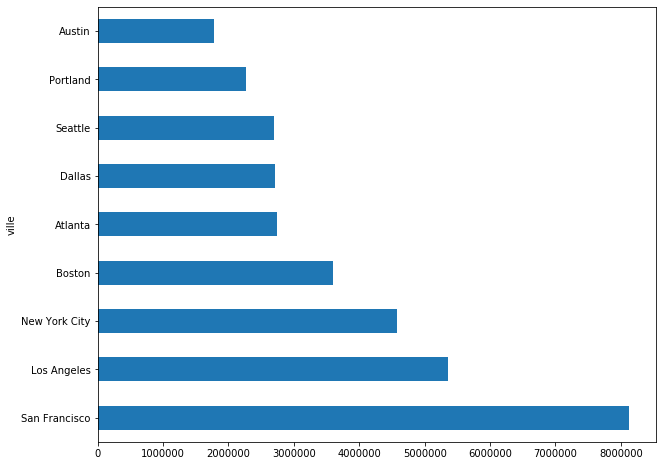

In [66]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

On a fait un meilleur chiffre d'affaire à San Francisco

In [99]:
ca_by_ville = df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

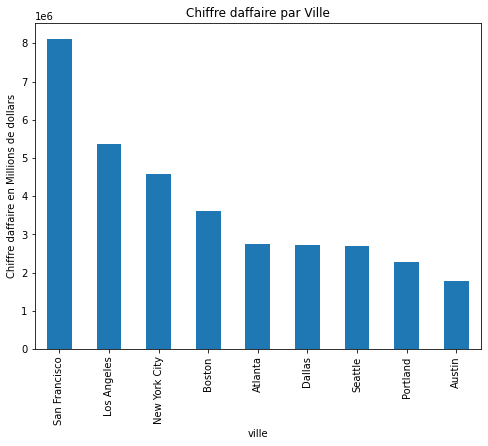

In [104]:
ca_by_ville.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Chiffre daffaire en Millions de dollars')
plt.title('Chiffre daffaire par Ville')
plt.show()

## A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

A quelle heure on vend le plus ?

In [67]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [68]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [69]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [70]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [71]:
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


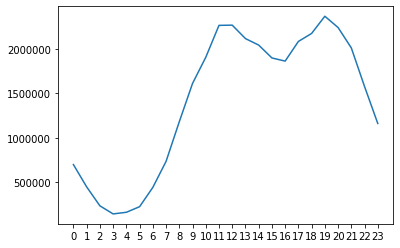

In [74]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.show()

On devrait afficher la publicité entre 10 et 11 et entre 18 et 19.

## Quels sont les produits qui sont souvent achetés ensemble ?

Les produits vendus ensemble ont le même `Order ID`.

In [128]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


Les ventes avec plus d'un produit : 

In [78]:
df_m = df_clean[df_clean['Order ID'].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
2019-01-01 12:02:00,148450,Lightning Charging Cable,1,14.95,"761 Lakeview St, Dallas, TX 75001",January,14.95,Dallas,12,12:02:00
2019-01-01 12:51:00,144679,Google Phone,1,600.00,"984 Lakeview St, San Francisco, CA 94016",January,600.00,San Francisco,12,12:51:00
2019-01-01 12:51:00,144679,USB-C Charging Cable,1,11.95,"984 Lakeview St, San Francisco, CA 94016",January,11.95,San Francisco,12,12:51:00
2019-01-01 12:57:00,147451,Google Phone,1,600.00,"229 Elm St, New York City, NY 10001",January,600.00,New York City,12,12:57:00


In [82]:
def concat_produit_par_order_id(p: list):
  return ";".join(p)

In [83]:
df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

Order ID
141275                Wired Headphones;USB-C Charging Cable
141290       Apple Airpods Headphones;AA Batteries (4-pack)
141365                     Wired Headphones;Vareebadd Phone
141384                    USB-C Charging Cable;Google Phone
141450              Bose SoundSport Headphones;Google Phone
141457                      iPhone;Apple Airpods Headphones
141478                Apple Airpods Headphones;Google Phone
141550     Wired Headphones;Apple Airpods Headphones;iPhone
141587        USB-C Charging Cable;Apple Airpods Headphones
141645            Wired Headphones;Lightning Charging Cable
141738                      iPhone;Lightning Charging Cable
141782          Bose SoundSport Headphones;27in FHD Monitor
141789                    Google Phone;USB-C Charging Cable
141795                              Wired Headphones;iPhone
141809                    USB-C Charging Cable;Google Phone
141843         AAA Batteries (4-pack);AA Batteries (4-pack)
141900    USB-C Charging Cable;

In [86]:
ensemble = df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

In [99]:
from itertools import combinations
from collections import Counter

count = Counter()

In [93]:
Counter(combinations(['a', 'c', 'b'], 2))

Counter({('a', 'c'): 1, ('a', 'b'): 1, ('c', 'b'): 1})

In [92]:
for i, j in combinations(['a', 'c', 'b'], 2):
    print(i, j)

a c
a b
c b


In [97]:
ensemble.to_list()

['Wired Headphones;USB-C Charging Cable',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'iPhone;Apple Airpods Headphones',
 'Apple Airpods Headphones;Google Phone',
 'Wired Headphones;Apple Airpods Headphones;iPhone',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 'Bose SoundSport Headphones;27in FHD Monitor',
 'Google Phone;USB-C Charging Cable',
 'Wired Headphones;iPhone',
 'USB-C Charging Cable;Google Phone',
 'AAA Batteries (4-pack);AA Batteries (4-pack)',
 'USB-C Charging Cable;Wired Headphones;Vareebadd Phone',
 'Google Phone;USB-C Charging Cable',
 'Vareebadd Phone;Wired Headphones',
 '34in Ultrawide Monitor;Lightning Charging Cable',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Google Phone;Wired Headphones',
 'Wired

In [100]:
for achat in ensemble.to_list():
    products = achat.split(';')
#     print(products)
    count.update(Counter(combinations(products, 2)))

In [101]:
count

Counter({('Wired Headphones', 'USB-C Charging Cable'): 93,
         ('Apple Airpods Headphones', 'AA Batteries (4-pack)'): 28,
         ('Wired Headphones', 'Vareebadd Phone'): 66,
         ('USB-C Charging Cable', 'Google Phone'): 498,
         ('Bose SoundSport Headphones', 'Google Phone'): 123,
         ('iPhone', 'Apple Airpods Headphones'): 184,
         ('Apple Airpods Headphones', 'Google Phone'): 10,
         ('Wired Headphones', 'Apple Airpods Headphones'): 48,
         ('Wired Headphones', 'iPhone'): 216,
         ('Apple Airpods Headphones', 'iPhone'): 171,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 29,
         ('Wired Headphones', 'Lightning Charging Cable'): 71,
         ('iPhone', 'Lightning Charging Cable'): 487,
         ('Bose SoundSport Headphones', '27in FHD Monitor'): 8,
         ('Google Phone', 'USB-C Charging Cable'): 468,
         ('AAA Batteries (4-pack)', 'AA Batteries (4-pack)'): 42,
         ('USB-C Charging Cable', 'Wired Headphones'): 

In [103]:
count.most_common(1)

[(('USB-C Charging Cable', 'Google Phone'), 498)]

In [104]:
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('USB-C Charging Cable', 'Google Phone') 498
('Lightning Charging Cable', 'iPhone') 496
('iPhone', 'Lightning Charging Cable') 487
('Google Phone', 'USB-C Charging Cable') 468
('iPhone', 'Wired Headphones') 236
('Wired Headphones', 'iPhone') 216
('Google Phone', 'Wired Headphones') 207
('Wired Headphones', 'Google Phone') 203
('iPhone', 'Apple Airpods Headphones') 184
('USB-C Charging Cable', 'Vareebadd Phone') 178


# Produit le plus vendu

In [105]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [108]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64